# Install Library

In [ ]:
%%capture
# ! pip install DXC-Industrialized-AI-Starter
! pip install git+https://github.com/madhubandru/DXC-Industrialized-AI-Starter.git
import os
os.kill(os.getpid(), 9)

In [ ]:
%%capture
from dxc import ai

# Load data and run model

In [ ]:
#Loading sample "iris" dataset
df = ai.load_data('iris')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# TODO: specify the details of the data layer
data_layer = {
    "connection_string": "<paste your connection string here>",
    "collection_name": "IRISCOLLECTION",
    "database_name": "IRIS"
}

In [ ]:
db = ai.write_raw_data(data_layer, df)

In [ ]:
# TODO: define the code needed to refine the raw data
def data_pipeline():

  pipe = [
          {
              '$group':{
                  '_id': {
                      "sepal length":"$sepal length",
                      "sepal width":"$sepal width",
                      "petal length":"$petal length",
                      "petal width":"$petal width",
                      "class":"$class"
                      }
                      }
              }
          
  ]

  return pipe

df = ai.access_data_from_pipeline(db, data_pipeline())
df.head()

,_id.sepal length,_id.sepal width,_id.petal length,_id.petal width,_id.class
0,5.8,2.8,5.1,2.4,Iris-virginica
1,7.7,3.0,6.1,2.3,Iris-virginica
2,6.7,3.3,5.7,2.1,Iris-virginica
3,6.2,2.8,4.8,1.8,Iris-virginica
4,4.4,3.2,1.3,0.2,Iris-setosa


In [ ]:
# TODO: design and run an experiment
experiment_design = {
    #model options include ['tpot_regression()', 'tpot_classification()']
    "model": ai.tpot_classification(),
    "labels": df['_id.class'],
    "data": df
}

#config_dict = {'sklearn.ensemble.GradientBoostingRegressor':{}}

trained_model = ai.run_experiment(experiment_design, verbose = False, max_time_mins = 1, max_eval_time_mins = 0.04, config_dict = None, warm_start = False, export_pipeline = True, scoring = None)


Accuracy: 0.9666666666666667

ROC_AUC_OVR: 1.0

ROC_AUC_OVO: 1.0

Recall: 0.9666666666666667

Precision: 0.9696969696969697

F1 Score: 0.9665831244778613



# Publish code to git

Create a github account and generate github personal access token ([PAT](https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token)) and enable ***public_repo*** access.

In [ ]:
github_design = {
    "GitHub_Username": "madhubandru",
    "Repository_Name": "iris-app-v15",
    "Branch": "master",
    "Commit_Message": "new app"
}
ai.publish_app_api(github_design)

Please enter your GitHub PAT
··········
Github Repo iris-app-v15 Created
list index out of range
Data saved in prepared_data.csv file
Target encoder saved in target_encoder.pkl file
Generated requirements.txt file
Generated app.py file to build the application
Generated procfile to build the application
Github Push Successful


# Deploy app to Heroku

**Steps:**
  1. Signup to [Heroku](https://signup.heroku.com/login) if you are new user.
  2. After Login, click on "**New**" >> "**Create new app**"
  3. Provide "**App name**" and click on "**create app**"
  4. Under "**Deploy**" tab "**Deployment method**" section select "**Github**" and connect to your github account.
  5. Once connected, under same "**Deploy**" tab under "**Connect to GitHub**" section search for your "**repo name**" and click "**connect**"
  6. Under "**manual deploy**" section select "**master**" branch and click "**Deploy Branch**"
  7. Once app successfully deployed, click on "**view**" and preserve the **url**.

**NOTE:** Once the app is deployed and opened on web, you will see below screen. Please note it is not an error and you api link still works.

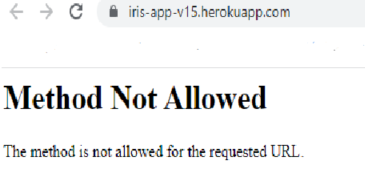

# Test Api

Use the above saved url and test for your use case.

In [ ]:
import requests, json
data = {
    '_id.sepal length':7.4,
    '_id.sepal width':2.8,
    '_id.petal length':6.1,
    '_id.petal width':1.9,
}

data = json.dumps(data)

url = "https://iris-app-v15.herokuapp.com/"
send_request = requests.post(url,data)
print(send_request.json()['results']['results'])

Iris-virginica
